In [ ]:
from google.colab import drive

drive.mount('/content/drive')
data_drive_location='/content/drive/MyDrive/FDA/Projects/Project2/data'

Mounted at /content/drive


# Download 3.5 GB dataset of Human Activity Recognition in Zip format and extract it on Drive Folder

The below commented lines help us in Downloading, extracting the data from the online source to your desired google drive location that has been mentioned above.

This includes some of the UNIX/Linux commands that make it more simplier. We don't need any manual intevention and these commands are automated.

In [ ]:
# !wget http://wifo5-14.informatik.uni-mannheim.de/sensor/dataset/realworld2016/realworld2016_dataset.zip

In [ ]:
# !unzip realworld2016_dataset.zip

In [ ]:
# !cp realworld2016_dataset.zip $data_drive_location

In [ ]:
# zip_location = data_drive_location+'/realworld2016_dataset.zip'
# !unzip $zip_location 

In [ ]:
# !cp -rf proband* $data_drive_location

In [ ]:
# data_drive_location='/content/drive/MyDrive/FDA/Projects/Project2/data'
# proband_location = data_drive_location+'/proband4'
# proband_data_location = proband_location+'/data'

# proband_climbing_up_location = proband_data_location+'/*climbingup_csv.zip'
# proband_climbing_down_location = proband_data_location+'/*climbingdown_csv.zip'

# proband_climbing_up_extract_location = proband_location+'/climbing_up'
# proband_climbing_down_extract_location = proband_location+'/climbing_down'

# # !mkdir $proband_climbing_up_extract_location
# # !mkdir $proband_climbing_down_extract_location


# # !cp -rf $proband_climbing_up_location $proband_climbing_up_extract_location
# # !cp -rf $proband_climbing_down_location $proband_climbing_down_extract_location

# # climbing_up_location = data_drive_location + '/climbing_down'+'/proband_data'
# # climbing_down_location = data_drive_location + '/climbing_down'
# # proband_climb_up_location = data_drive_location+'/proband/data/*climbingup_csv.zip'

# # !cp -rf $proband_climb_up_location $climbing_up_location

In [ ]:
# proband_climbing_up_zip_location = proband_climbing_up_extract_location+'/*.zip'

# !unzip $proband_climbing_up_zip_location -d $proband_climbing_up_zip_location

In [ ]:
# proband_climbing_up_csv_location = proband_climbing_up_extract_location+'/*csv/*.csv'
# proband_climbing_down_csv_location = proband_climbing_down_extract_location+'/*csv/*.csv'

# # !cp -rf $proband_climbing_up_csv_location $proband_climbing_up_extract_location
# # !cp -rf $proband_climbing_down_csv_location $proband_climbing_down_extract_location

# proband_climbing_up_clear_location = proband_climbing_up_extract_location+'/*_csv'
# proband_climbing_down_clear_location = proband_climbing_down_extract_location+'/*_csv'
# proband_climbing_up_clear_zip_location = proband_climbing_up_extract_location+'/*_csv.zip'
# proband_climbing_down_clear_zip_location = proband_climbing_down_extract_location+'/*_csv.zip'

# # # #!rm -rf /content/drive/MyDrive/FDA/Projects/Project2/data/proband4/climbingup/*_csv
# !rm -rf $proband_climbing_up_clear_location $proband_climbing_down_clear_location $proband_climbing_up_clear_zip_location $proband_climbing_down_clear_zip_location

**Unzip the files to get actual dataset**

In [ ]:
# !unzip /content/drive/MyDrive/FDA/Projects/Project2/data/proband4/climbing_down/gps_climbingdown_csv.zip -d /content/drive/MyDrive/FDA/Projects/Project2/data/proband4/climbing_down/

In [ ]:
!pip install ts2vg
!pip install igraph
!pip install pycairo
!pip install cairocffi

     |████████████████████████████████| 1.0 MB 8.6 MB/s 
     |████████████████████████████████| 3.1 MB 7.3 MB/s 
     |████████████████████████████████| 340 kB 9.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
     |████████████████████████████████| 88 kB 3.5 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89668 sha256=f97d7853103e1e9812701348898a9d59ac27801dc692ca4da73ec25e59b1ac4a
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi


In [ ]:
import numpy as np
import pandas as pd
from ts2vg import NaturalVG, HorizontalVG
import os.path
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Visibility Graph
Two arbitrary data values $\left(t_{a}, y_{a}\right)$ and $\left(t_{b}, y_{b}\right)$ will have visibility, and consequently will become two connected nodes of the associated graph, if any other data $\left(t_{c}, y_{c}\right)$ placed between them fulfills:
$$
y_{c}<y_{b}+\left(y_{a}-y_{b}\right) \frac{t_{b}-t_{c}}{t_{b}-t_{a}} \text {. }
$$

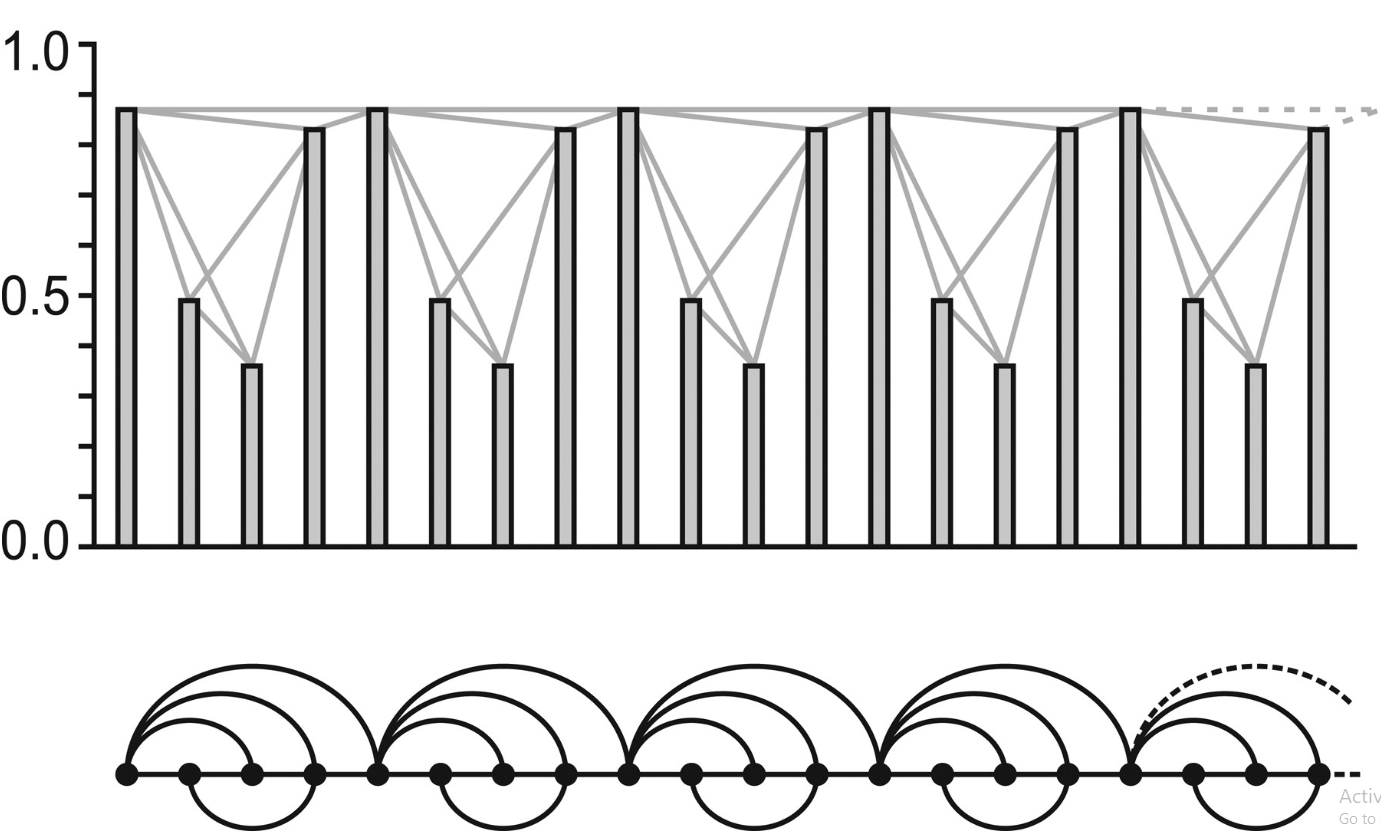


# Horizontal Visibility Graph
The horizontal visibility algorithm maps time series into graphs and it is defined as follows. Let $\left\{x_{i}\right\}_{i=1 . . N}$ be a time series of $N$ data. The algorithm assigns each datum of the series to a node in the horizontal visibility graph (graph from now on). Two nodes $i$ and $j$ in the graph are connected if one can draw a horizontal line in the time series joining $x_{i}$ and $x_{j}$ that does not intersect any intermediate data height (see figure 2 for a graphical illustration). Hence, $i$ and $j$ are two connected nodes if the following geometrical criterion is fulfilled within the time series:
$x_{i}, x_{j}>x_{n}$ for all $n$ such that $i<n<j$ 


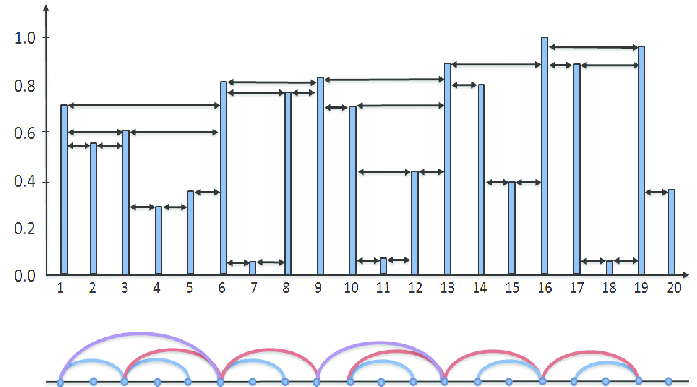

In [ ]:
def natural_visibility_graph(timeSeries):
  nat_graph = NaturalVG()
  nat_graph.build(timeSeries)
  vis_graph = nat_graph.as_igraph()
  # print(vis_graph)
  # print('Number of Nodes:',nat_graph.vcount())
  # print('Number of Links:',nat_graph.ecount())
  avg_degree = np.mean(vis_graph.degree())
  diameter = vis_graph.diameter()
  avg_path_length = vis_graph.average_path_length()
  # print('Average Degree:',avg_degree)
  # print('Network Diameter:',diameter)
  # print('Average Path Length:',avg_path_length)
  return nat_graph, avg_degree, diameter, avg_path_length

def horizontal_visibility(timeSeries):
  hor_graph = HorizontalVG()
  hor_graph.build(timeSeries)
  vis_graph = hor_graph.as_igraph()
  # print(vis_graph)
  # print('Number of Nodes:',hor_graph.vcount())
  # print('Number of Links:',hor_graph.ecount())
  avg_degree = np.mean(vis_graph.degree())
  diameter = vis_graph.diameter()
  avg_path_length = vis_graph.average_path_length()
  # print('Average Degree:',avg_degree)
  # print('Network Diameter:',diameter)
  # print('Average Path Length:',avg_path_length)
  return hor_graph,  avg_degree, diameter, avg_path_length


In [ ]:
def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

## r studio code for time series 
## pyrqa - recurrent quantification analysis

# **Task1**

## 1. Apply natural visibility graph (NVG) and horizontal visibility graph (HVG) to theaforementioned data

## 2. Compute average degree, network diameter, and average path length


## 3. For the above computations select sample size of 1024 data points ( from 1000 to 2024) for each of the 15 time series


## 4. Tabulate all the results

## Combined for 1-4

In [ ]:
subjects = ['proband1', 'proband2', 'proband3', 'proband4', 
            'proband5', 'proband6', 'proband7', 'proband8',
            'proband9', 'proband10', 'proband11', 'proband12',
            'proband13', 'proband14', 'proband15']
activities = ['climbingdown', 'climbingup', 'running', 'walking']
accelorometer = 'acc'
sensor_locations = ['chest','forearm','head','shin','thigh','upperarm','waist']
extensions = ['','1_','2_','3_']
axes = ['attr_x','attr_y','attr_z']

As mentioned above all the files are finely grained to its last CSV file. So they follow a pattern in the folders. We used that format to completely analyze the data.

In [ ]:
def task1_function():
  result1 = pd.DataFrame(columns=['Method', 'Subject', 'Accelerometer Axis','Average degree','Network diameter','Average path length','Activity','Sensor_Position','Extension'])
  for subject in subjects:
    for activity in activities:
      for sensor_location in sensor_locations:
        for ext in extensions:
          data_file_location = data_drive_location+'/'+subject+'/'+activity+'/'+accelorometer+'_'+activity+'_'+ext+sensor_location+'.csv'
          # print(data_file_location)
          if os.path.exists(data_file_location):
            for axis in axes:
              data = pd.read_csv(data_file_location)
              graph, degree, diameter, avg_path_length = horizontal_visibility(data[axis][1000:2024])
              # print("H Visibility", subject, axis, degree, diameter, avg_path_length, job_type, ext)
              result1 = result1.append({'Method':'HVG','Subject': subject,'Accelerometer Axis': axis, 'Average degree': degree,  'Network diameter' : diameter, 'Average path length':avg_path_length,'Activity':activity,'Sensor_Position':sensor_location,'Extension':ext}, ignore_index = True)
              graph, degree, diameter, avg_path_length = natural_visibility_graph(data[axis][1000:2024])
              result1 = result1.append({'Method':'NVG','Subject': subject,'Accelerometer Axis': axis, 'Average degree': degree,  'Network diameter' : diameter, 'Average path length':avg_path_length,'Activity':activity,'Sensor_Position':sensor_location,'Extension':ext}, ignore_index = True)
  return result1     

In [ ]:
task1_result = task1_function()

In [ ]:
task1_result

,Method,Subject,Accelerometer Axis,Average degree,Network diameter,Average path length,Activity,Sensor_Position,Extension
0,HVG,proband1,attr_x,3.951172,32,14.510884,climbingdown,chest,
1,NVG,proband1,attr_x,15.609375,16,6.598815,climbingdown,chest,
2,HVG,proband1,attr_y,3.947266,28,12.518642,climbingdown,chest,
3,NVG,proband1,attr_y,14.087891,10,4.261784,climbingdown,chest,
4,HVG,proband1,attr_z,3.968750,23,9.949156,climbingdown,chest,
...,...,...,...,...,...,...,...,...,...
3013,NVG,proband15,attr_x,10.216797,14,4.815265,walking,waist,
3014,HVG,proband15,attr_y,3.968750,20,9.661313,walking,waist,
3015,NVG,proband15,attr_y,8.873047,11,5.085678,walking,waist,
3016,HVG,proband15,attr_z,3.972656,19,9.113724,walking,waist,


## 5. Generate  scatter plots: average degree vs network diameter and color the points according to walking and running (do this for each accelerometer signal and each method (HVH and NVG))

In [ ]:
df_walk_run = task1_result[(task1_result["Activity"] == 'walking')]
df_walk_run = df_walk_run.append(task1_result[(task1_result["Activity"] == 'running')])

In [ ]:
## filter the dataset based on sensor positons
df_walk_run_chest = df_walk_run[df_walk_run["Sensor_Position"] == 'chest']
df_walk_run_forearm = df_walk_run[df_walk_run["Sensor_Position"] == 'forearm']
df_walk_run_head = df_walk_run[df_walk_run["Sensor_Position"] == 'head']
df_walk_run_shin = df_walk_run[df_walk_run["Sensor_Position"] == 'shin']
df_walk_run_thigh = df_walk_run[df_walk_run["Sensor_Position"] == 'thigh']
df_walk_run_upperarm = df_walk_run[df_walk_run["Sensor_Position"] == 'upperarm']
df_walk_run_waist = df_walk_run[df_walk_run["Sensor_Position"] == 'waist']

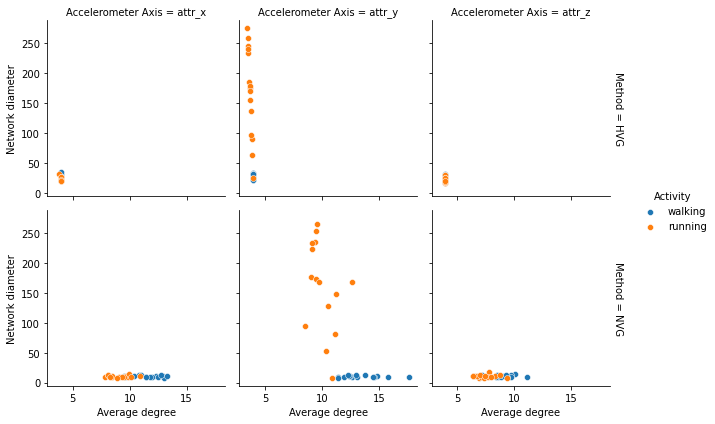

In [ ]:
g = sns.FacetGrid(df_walk_run_chest, col="Accelerometer Axis", hue="Activity", row ="Method", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Average degree", y="Network diameter", palette='deep')
g.add_legend()
plt.show()

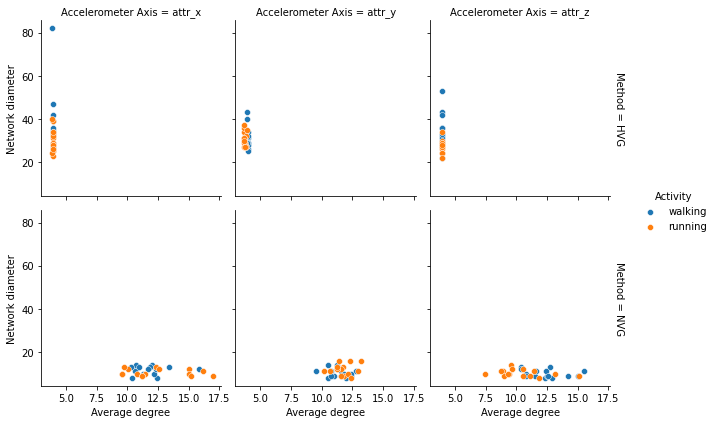

In [ ]:
g = sns.FacetGrid(df_walk_run_forearm, col="Accelerometer Axis", hue="Activity", row ="Method", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Average degree", y="Network diameter", palette='deep')
g.add_legend()
plt.show()

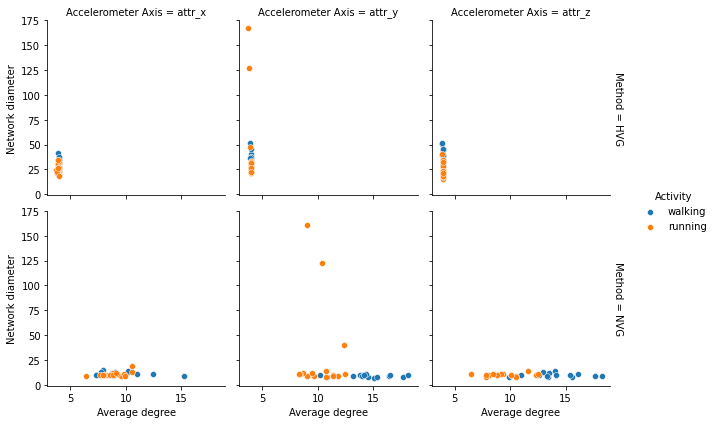

In [ ]:
g = sns.FacetGrid(df_walk_run_head, col="Accelerometer Axis", hue="Activity", row ="Method", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Average degree", y="Network diameter", palette='deep')
g.add_legend()
plt.show()

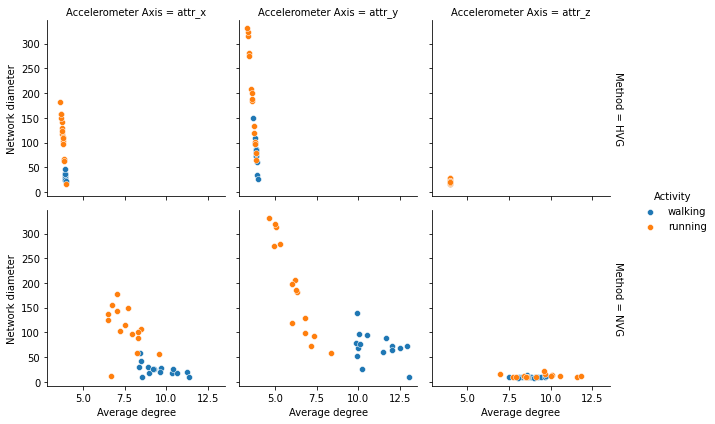

In [ ]:
g = sns.FacetGrid(df_walk_run_shin, col="Accelerometer Axis", hue="Activity", row ="Method", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Average degree", y="Network diameter", palette='deep')
g.add_legend()
plt.show()

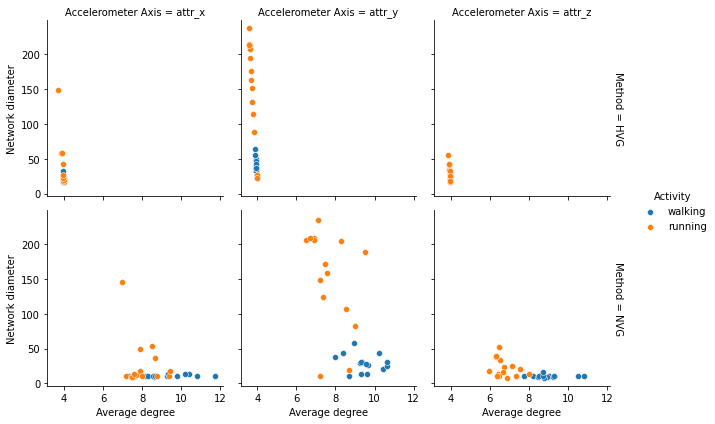

In [ ]:
g = sns.FacetGrid(df_walk_run_thigh, col="Accelerometer Axis", hue="Activity", row ="Method", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Average degree", y="Network diameter", palette='deep')
g.add_legend()
plt.show()

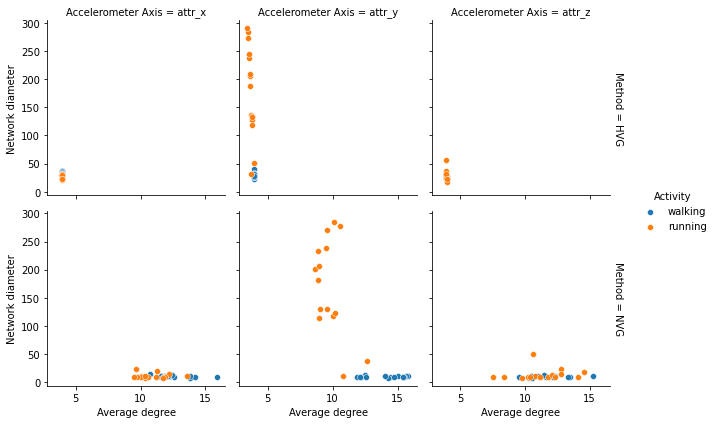

In [ ]:
g = sns.FacetGrid(df_walk_run_upperarm, col="Accelerometer Axis", hue="Activity", row ="Method", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Average degree", y="Network diameter", palette='deep')
g.add_legend()
plt.show()

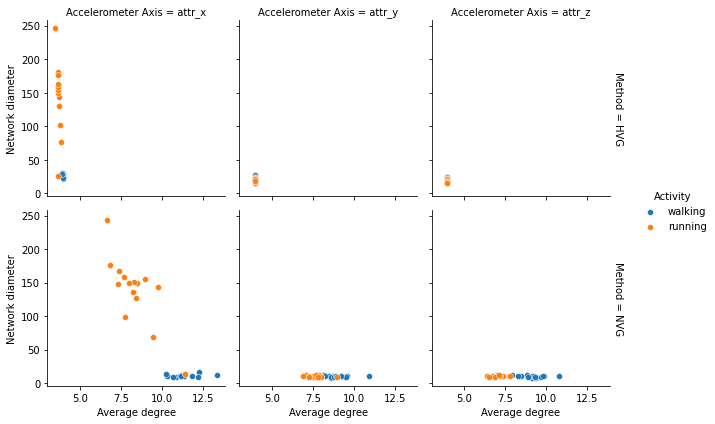

In [ ]:
g = sns.FacetGrid(df_walk_run_waist, col="Accelerometer Axis", hue="Activity", row ="Method", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Average degree", y="Network diameter", palette='deep')
g.add_legend()
plt.show()

> According to the graphs above it can bee seen that Attribute Y for the sensor shin in the method NVG gives you most better seperation between walking and running activity of the subjects.

> As for the HVG there is overlap for the walking and running activity.

As Note we should not compare both the methods, we need to use the method that gives you the optimal solution, as both the methods use different kins of approach.

## 6. Generate  scatter plots: average degree vs network diameter and color the points according to climbing up and climbing down (do this for each accelerometer signal and each method (HVH and NVG

In [ ]:
df_climb = task1_result[(task1_result["Activity"] == 'climbingup')]
df_climb = df_climb.append(task1_result[(task1_result["Activity"] == 'climbingdown')])

In [ ]:
## filter the dataset based on sensor positons
df_climb_chest = df_climb[df_climb["Sensor_Position"] == 'chest']
df_climb_forearm = df_climb[df_climb["Sensor_Position"] == 'forearm']
df_climb_head = df_climb[df_climb["Sensor_Position"] == 'head']
df_climb_shin = df_climb[df_climb["Sensor_Position"] == 'shin']
df_climb_thigh = df_climb[df_climb["Sensor_Position"] == 'thigh']
df_climb_upperarm = df_climb[df_climb["Sensor_Position"] == 'upperarm']
df_climb_waist = df_climb[df_climb["Sensor_Position"] == 'waist']

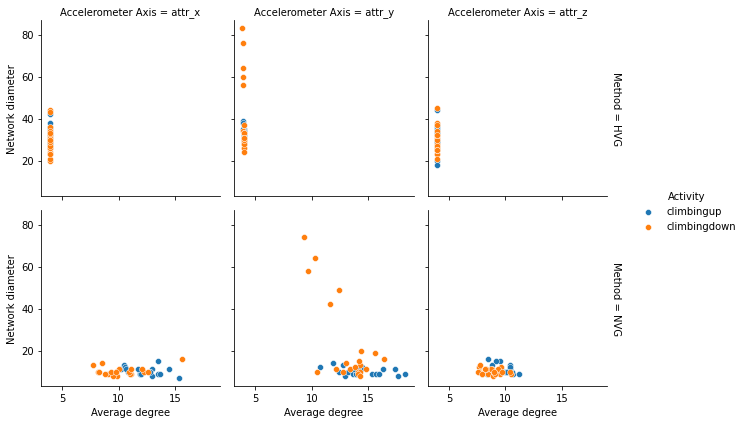

In [ ]:
g = sns.FacetGrid(df_climb_chest, col="Accelerometer Axis", hue="Activity", row ="Method", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Average degree", y="Network diameter", palette='deep')
g.add_legend()
plt.show()

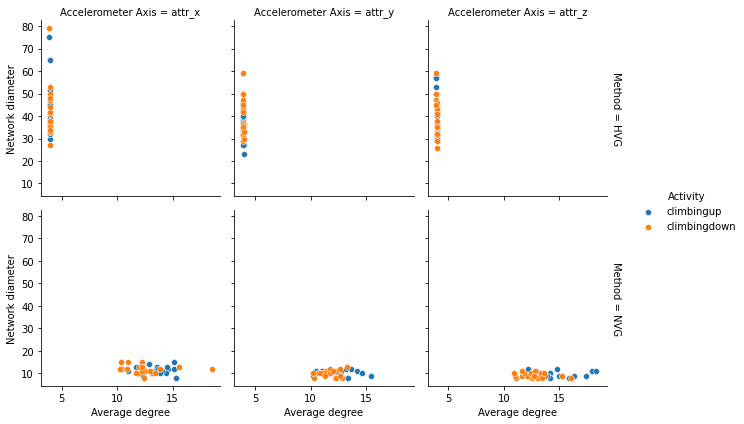

In [ ]:
g = sns.FacetGrid(df_climb_forearm, col="Accelerometer Axis", hue="Activity", row ="Method", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Average degree", y="Network diameter", palette='deep')
g.add_legend()
plt.show()

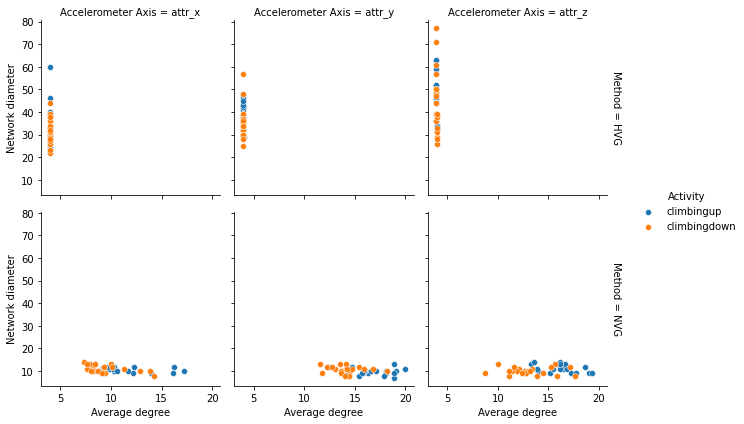

In [ ]:
g = sns.FacetGrid(df_climb_head, col="Accelerometer Axis", hue="Activity", row ="Method", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Average degree", y="Network diameter", palette='deep')
g.add_legend()
plt.show()

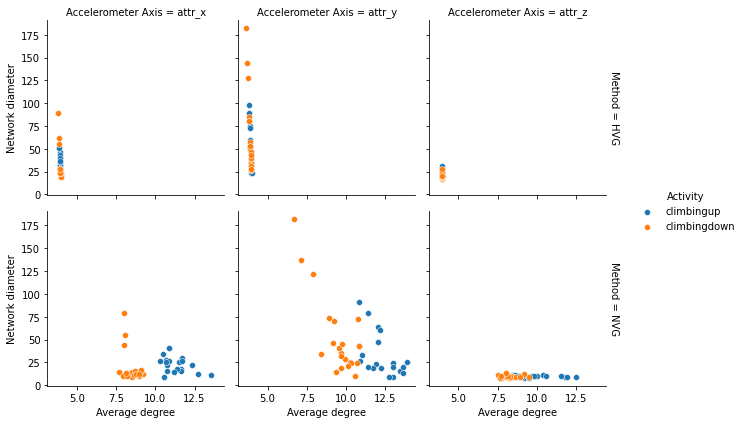

In [ ]:
g = sns.FacetGrid(df_climb_shin, col="Accelerometer Axis", hue="Activity", row ="Method", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Average degree", y="Network diameter", palette='deep')
g.add_legend()
plt.show()

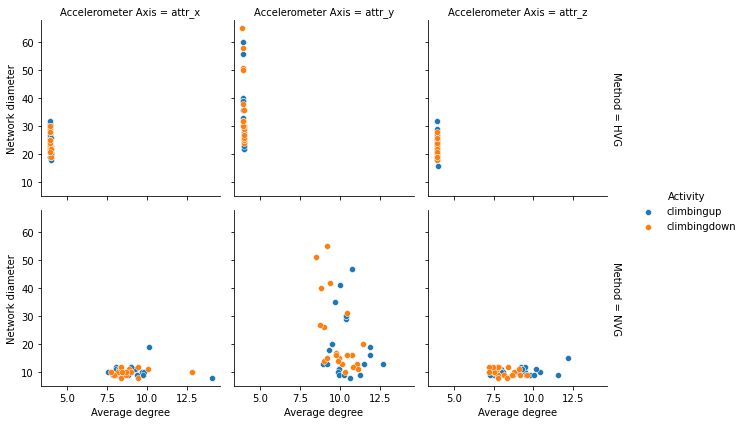

In [ ]:
g = sns.FacetGrid(df_climb_thigh, col="Accelerometer Axis", hue="Activity", row ="Method", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Average degree", y="Network diameter", palette='deep')
g.add_legend()
plt.show()

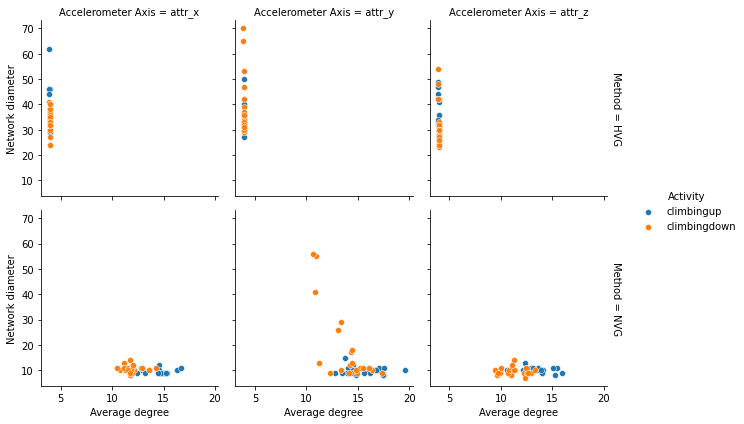

In [ ]:
g = sns.FacetGrid(df_climb_upperarm, col="Accelerometer Axis", hue="Activity", row ="Method", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Average degree", y="Network diameter", palette='deep')
g.add_legend()
plt.show()

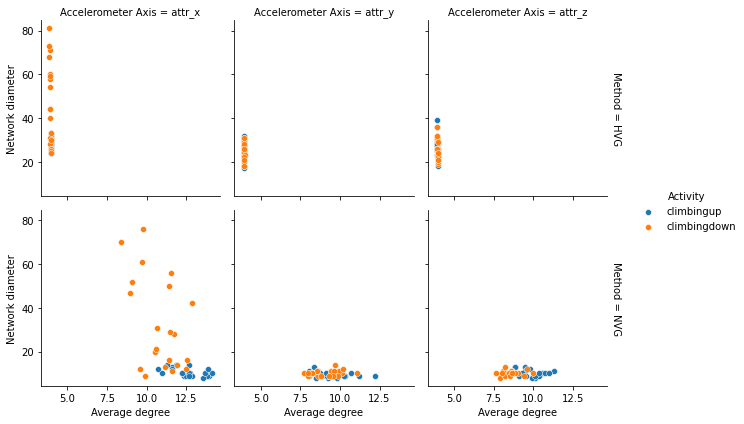

In [ ]:
g = sns.FacetGrid(df_climb_waist, col="Accelerometer Axis", hue="Activity", row ="Method", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Average degree", y="Network diameter", palette='deep')
g.add_legend()
plt.show()

> According to the graphs above it can bee seen that Attribute X in the method NVG and sensor location shin gives you most better seperation between climbing up and down activity of the subjects.

> As for the HVG there is overlap for the climbing up and down activity.

As Note we should not compare both the methods, we need to use the method that gives you the optimal solution, as both the methods use different kins of approach.

# **Task2**

# 1. Compute permutation entropy and complexity for the aforementioned data Consider the accelerometer data in all three directions 


# 2. Vary the following parameters Embedded Dimension 3, 4, 5, 6 Embedded Delay 1, 2, 3 Signal length 1024, 2048, 4096

In [ ]:
Embedded_Dimension = [3, 4, 5, 6]
Embedded_Delay = [1, 2, 3]
Signal_length = [1024, 2048, 4096]

probands = ['proband1', 'proband2', 'proband3', 'proband4', 
            'proband5', 'proband6', 'proband7', 'proband8',
            'proband9', 'proband10', 'proband11', 'proband12',
            'proband13', 'proband14', 'proband15']

def task2_function():
  result2 = pd.DataFrame(columns=['Subject', 'Accelerometer Axis','Signal length','Dimension', 'Delay', 'Permutation entropy','Complexity','Activity','Sensor_Position'])

  for subject in probands:
    for activity in activities:
      for sensor_location in sensor_locations:
        for ext in extensions:
          data_file_location = data_drive_location+'/'+subject+'/'+activity+'/'+accelorometer+'_'+activity+'_'+ext+sensor_location+'.csv'
          
          if os.path.exists(data_file_location):
            # print(data_file_location)
            for axis in axes:
              df = pd.read_csv(data_file_location)
              for Signal in Signal_length:
                ts = df[axis][:Signal] 
                for dimension in Embedded_Dimension :
                  for delay in Embedded_Delay :
                    op = ordinal_patterns(ts, dimension,delay ) #embedding dimension and embedding delay
                    pe = p_entropy(op)
                    comp = complexity(op)
                    result2 = result2.append({'Subject': subject,'Accelerometer Axis': axis,'Signal length': Signal,'Dimension': dimension,'Delay':delay, 'Permutation entropy':pe,'Complexity':comp,'Activity':activity,'Sensor_Position':sensor_location}, ignore_index = True)
  
  return result2

In [ ]:
task2_result = task2_function()
task2_result

,Subject,Accelerometer Axis,Signal length,Dimension,Delay,Permutation entropy,Complexity,Activity,Sensor_Position
0,proband1,attr_x,1024,3,1,0.863880,0.113789,climbingdown,chest
1,proband1,attr_x,1024,3,2,0.960872,0.036053,climbingdown,chest
2,proband1,attr_x,1024,3,3,0.985169,0.014123,climbingdown,chest
3,proband1,attr_x,1024,4,1,0.807330,0.188031,climbingdown,chest
4,proband1,attr_x,1024,4,2,0.937040,0.073841,climbingdown,chest
...,...,...,...,...,...,...,...,...,...
54319,proband15,attr_z,4096,5,2,0.873623,0.196242,walking,waist
54320,proband15,attr_z,4096,5,3,0.899422,0.161733,walking,waist
54321,proband15,attr_z,4096,6,1,0.764962,0.305253,walking,waist
54322,proband15,attr_z,4096,6,2,0.879198,0.223222,walking,waist


# 3. Generate scatter plots:  permutation entropy vs complexity and color the points according to walking and running (for signal length =4096, embedded delay = 1, and embedded dimension = 3, 4, 5, 6, and all three accelerometer directions)

In [ ]:
df2_selected = task2_result[(task2_result['Delay']==1) & (task2_result["Signal length"] == 4096)]

In [ ]:
df2_walk_run = df2_selected[(df2_selected["Activity"] == 'walking') | (df2_selected["Activity"] == 'running')]

In [ ]:
## filter the dataset based on sensor positons
df2_walk_run_chest = df2_walk_run[df2_walk_run["Sensor_Position"] == 'chest']
df2_walk_run_forearm = df2_walk_run[df2_walk_run["Sensor_Position"] == 'forearm']
df2_walk_run_head = df2_walk_run[df2_walk_run["Sensor_Position"] == 'head']
df2_walk_run_shin = df2_walk_run[df2_walk_run["Sensor_Position"] == 'shin']
df2_walk_run_thigh = df2_walk_run[df2_walk_run["Sensor_Position"] == 'thigh']
df2_walk_run_upperarm = df2_walk_run[df2_walk_run["Sensor_Position"] == 'upperarm']
df2_walk_run_waist = df2_walk_run[df2_walk_run["Sensor_Position"] == 'waist']

FacetGrid in seaborn is a special function in the library that helps us visualize the data on column based conditions. As mentioned below it is seggregating the graphs based on the Accelorometer axis and dimensions.

It is used as Multi-plot grid for plotting conditional relationships.



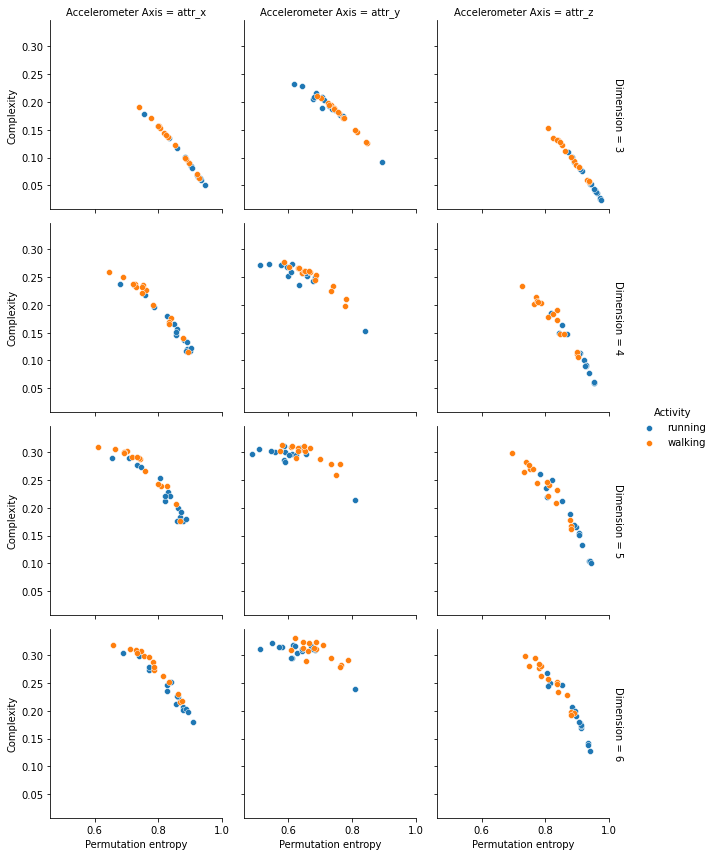

In [ ]:
g = sns.FacetGrid(df2_walk_run_chest, col="Accelerometer Axis", hue="Activity", row ="Dimension", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Permutation entropy", y="Complexity", palette='deep')
g.add_legend()
plt.show()

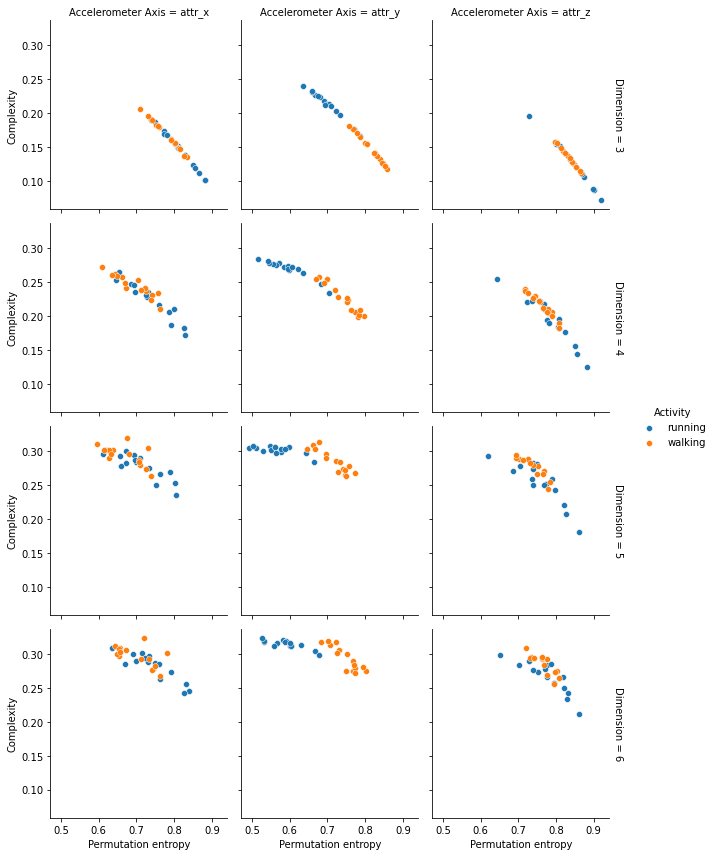

In [ ]:
g = sns.FacetGrid(df2_walk_run_forearm, col="Accelerometer Axis", hue="Activity", row ="Dimension", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Permutation entropy", y="Complexity", palette='deep')
g.add_legend()
plt.show()

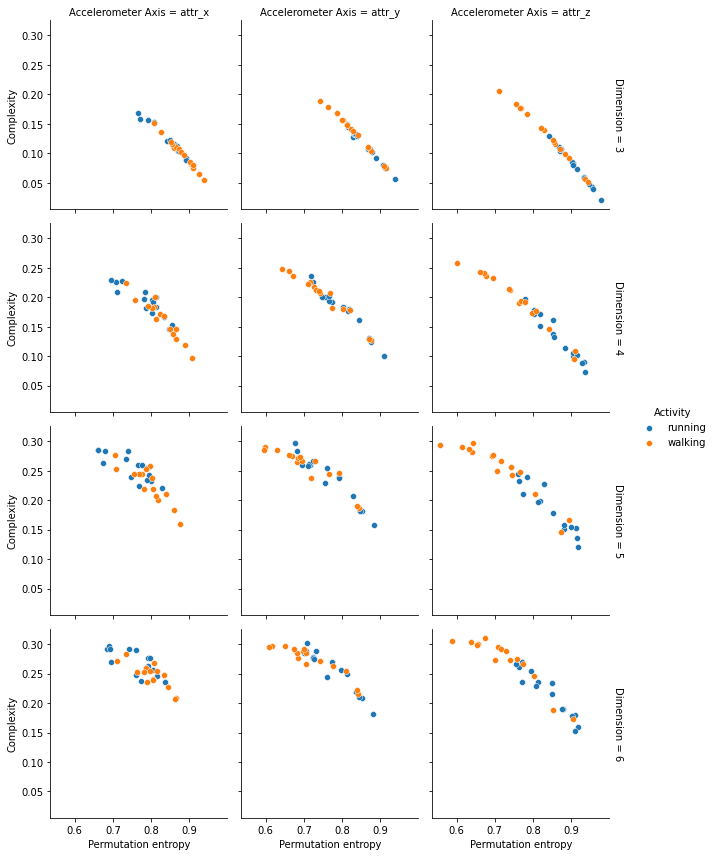

In [ ]:
g = sns.FacetGrid(df2_walk_run_head, col="Accelerometer Axis", hue="Activity", row ="Dimension", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Permutation entropy", y="Complexity", palette='deep')
g.add_legend()
plt.show()

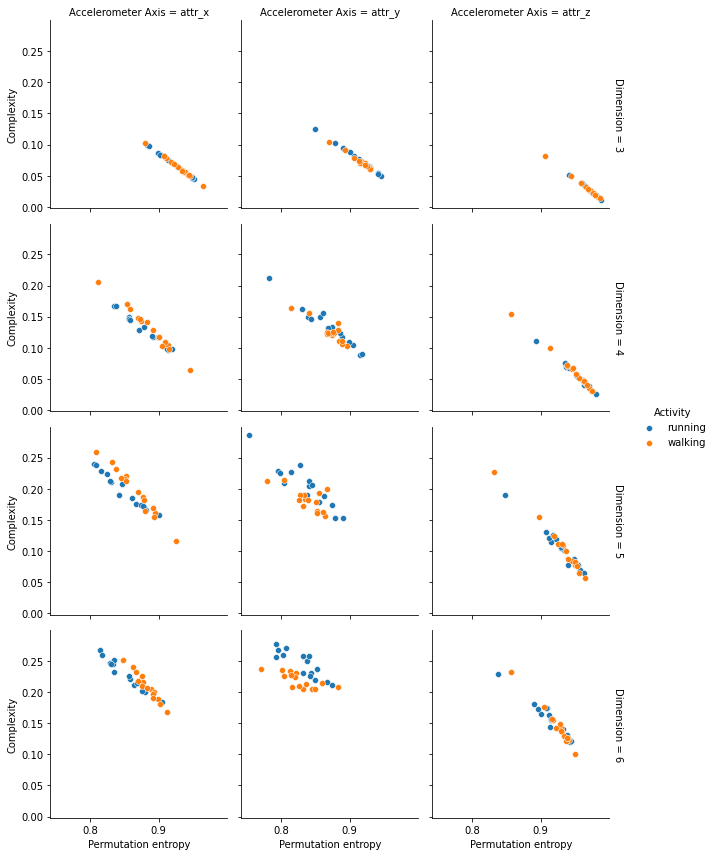

In [ ]:
g = sns.FacetGrid(df2_walk_run_shin, col="Accelerometer Axis", hue="Activity", row ="Dimension", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Permutation entropy", y="Complexity", palette='deep')
g.add_legend()
plt.show()

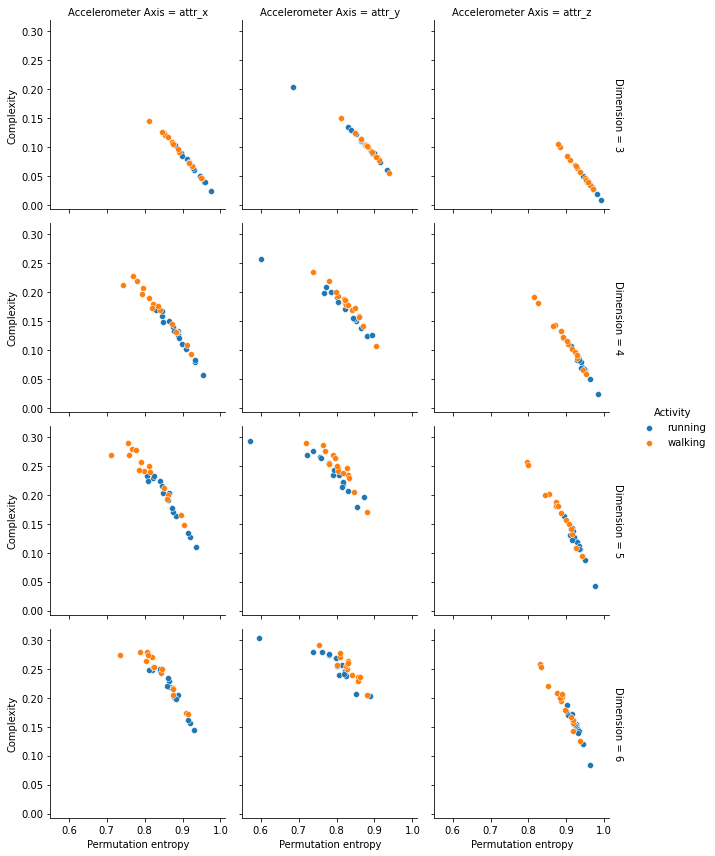

In [ ]:
g = sns.FacetGrid(df2_walk_run_thigh, col="Accelerometer Axis", hue="Activity", row ="Dimension", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Permutation entropy", y="Complexity", palette='deep')
g.add_legend()
plt.show()

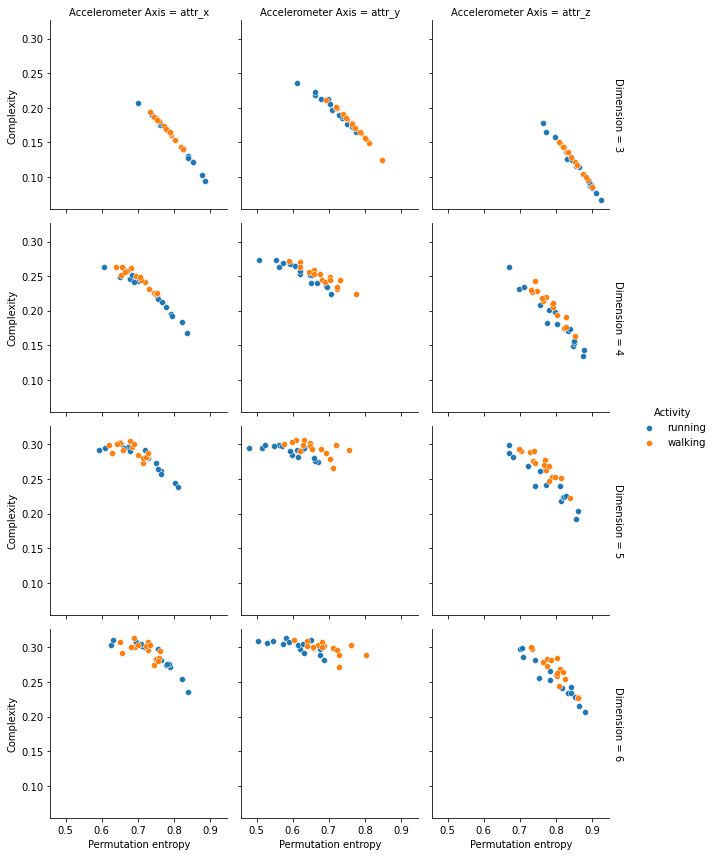

In [ ]:
g = sns.FacetGrid(df2_walk_run_upperarm, col="Accelerometer Axis", hue="Activity", row ="Dimension", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Permutation entropy", y="Complexity", palette='deep')
g.add_legend()
plt.show()

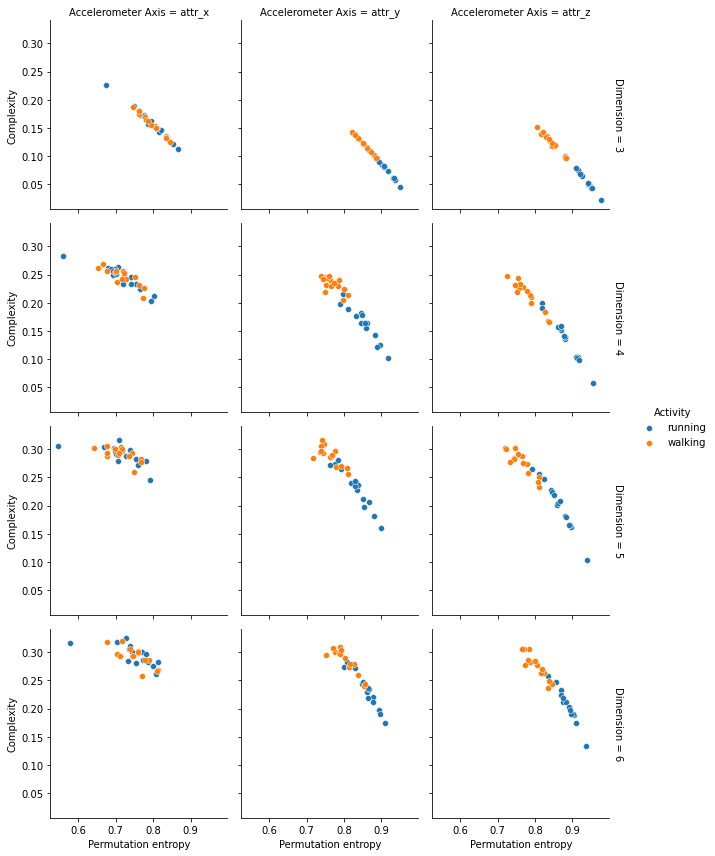

In [ ]:
g = sns.FacetGrid(df2_walk_run_waist, col="Accelerometer Axis", hue="Activity", row ="Dimension", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Permutation entropy", y="Complexity", palette='deep')
g.add_legend()
plt.show()

> As per the graphs above we are getting better seperation between walking and running for Dimension 3 of forearm sensor on accelerometer Y.

# 4.Generate  scatter plots: permutation entropy vs complexity and color the points according to climbing up and climbing down (for signal length =4096, embedded delay = 1, and embedded dimension = 3, 4, 5, 6, all three accelerometer directions)

In [ ]:
df2_climb = df2_selected[(df2_selected["Activity"] == 'climbingup') | (df2_selected["Activity"] == 'climbingdown')]

In [ ]:
## filter the dataset based on sensor positons
df2_climb_chest = df2_climb[df2_climb["Sensor_Position"] == 'chest']
df2_climb_forearm = df2_climb[df2_climb["Sensor_Position"] == 'forearm']
df2_climb_head = df2_climb[df2_climb["Sensor_Position"] == 'head']
df2_climb_shin = df2_climb[df2_climb["Sensor_Position"] == 'shin']
df2_climb_thigh = df2_climb[df2_climb["Sensor_Position"] == 'thigh']
df2_climb_upperarm = df2_climb[df2_climb["Sensor_Position"] == 'upperarm']
df2_climb_waist = df2_climb[df2_climb["Sensor_Position"] == 'waist']

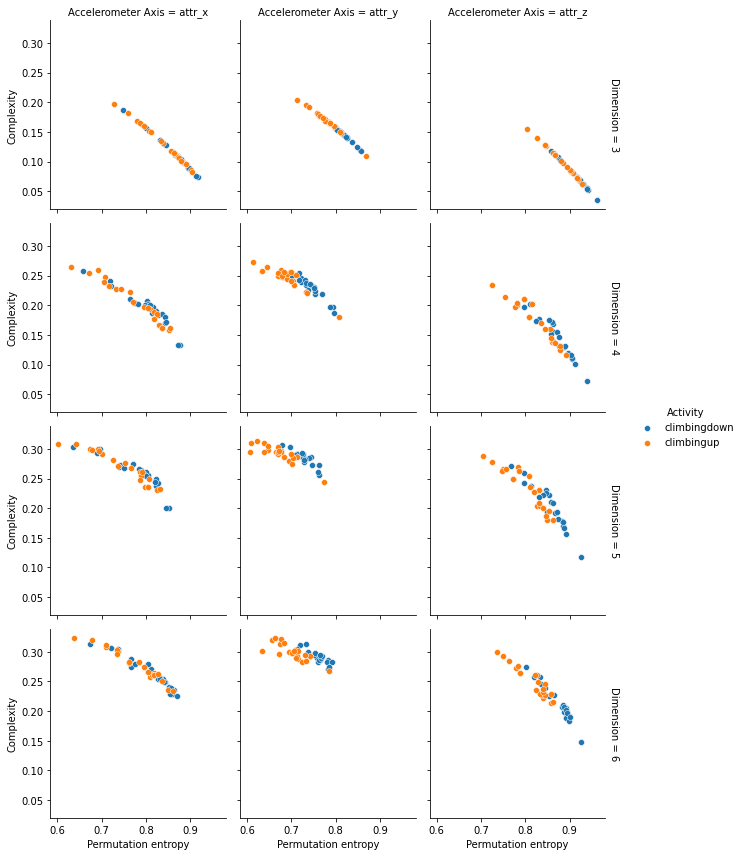

In [ ]:
g = sns.FacetGrid(df2_climb_chest, col="Accelerometer Axis", hue="Activity", row ="Dimension", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Permutation entropy", y="Complexity", palette='deep')
g.add_legend()
plt.show()

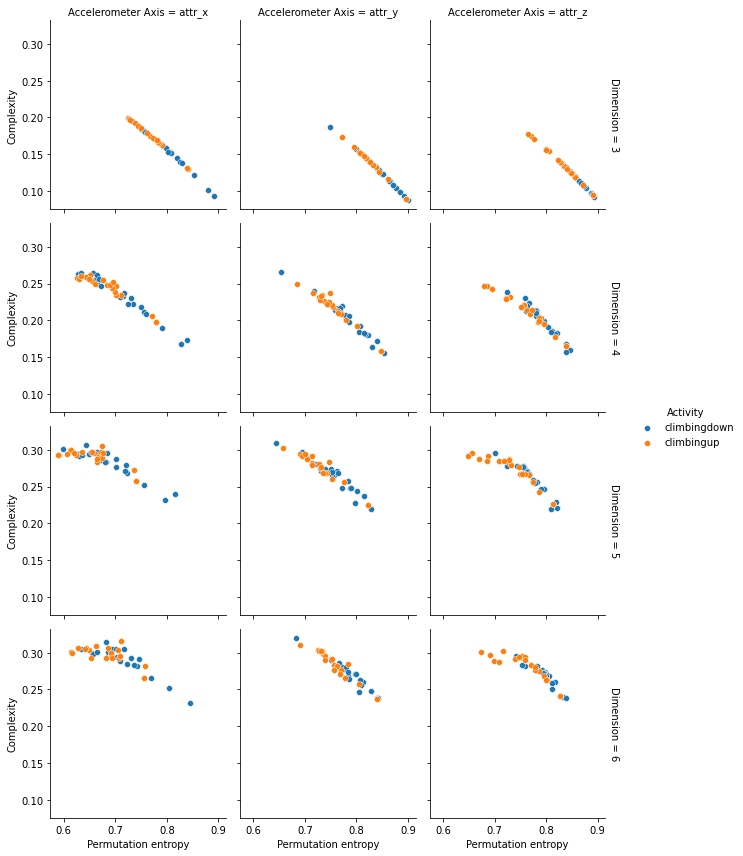

In [ ]:
g = sns.FacetGrid(df2_climb_forearm, col="Accelerometer Axis", hue="Activity", row ="Dimension", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Permutation entropy", y="Complexity", palette='deep')
g.add_legend()
plt.show()

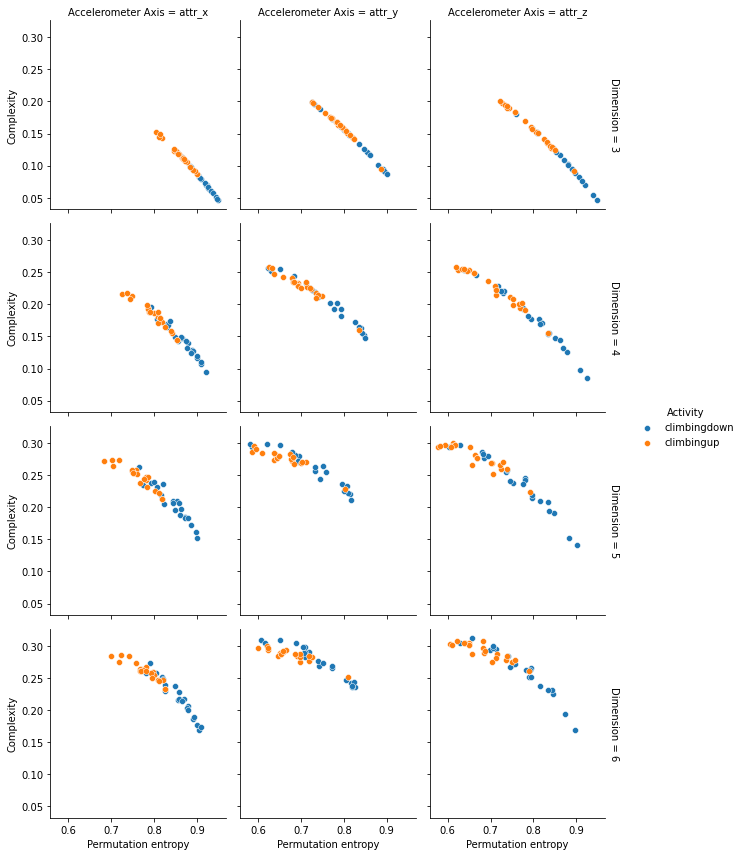

In [ ]:
g = sns.FacetGrid(df2_climb_head, col="Accelerometer Axis", hue="Activity", row ="Dimension", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Permutation entropy", y="Complexity", palette='deep')
g.add_legend()
plt.show()

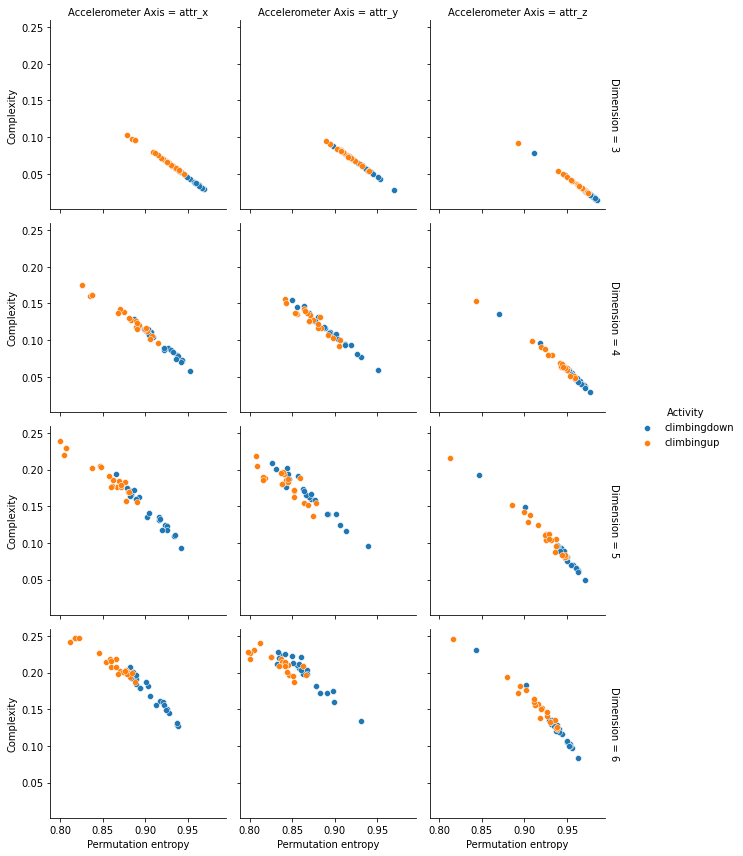

In [ ]:
g = sns.FacetGrid(df2_climb_shin, col="Accelerometer Axis", hue="Activity", row ="Dimension", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Permutation entropy", y="Complexity", palette='deep')
g.add_legend()
plt.show()

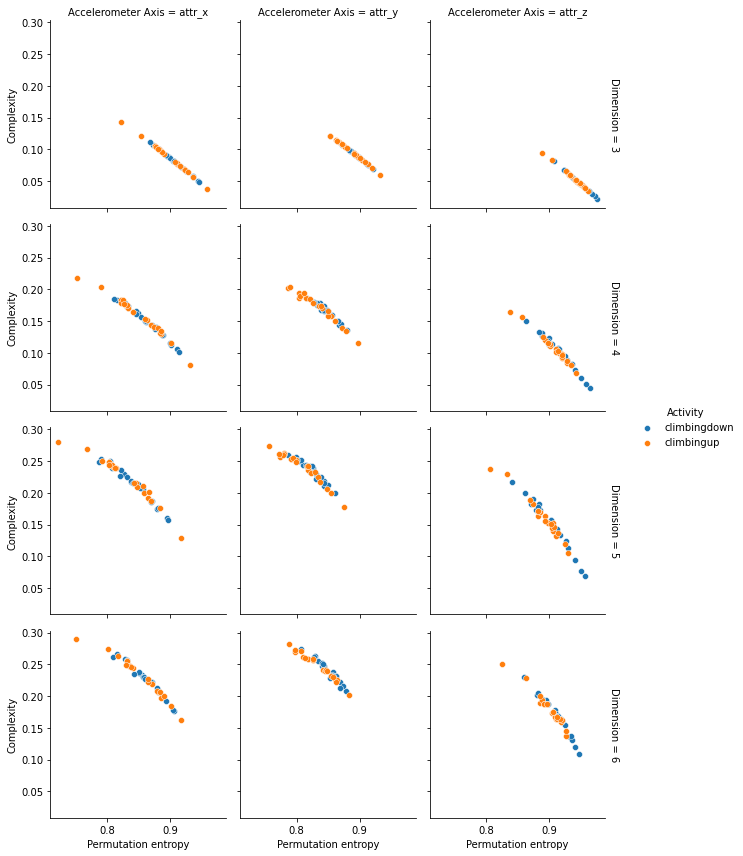

In [ ]:
g = sns.FacetGrid(df2_climb_thigh, col="Accelerometer Axis", hue="Activity", row ="Dimension", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Permutation entropy", y="Complexity", palette='deep')
g.add_legend()
plt.show()

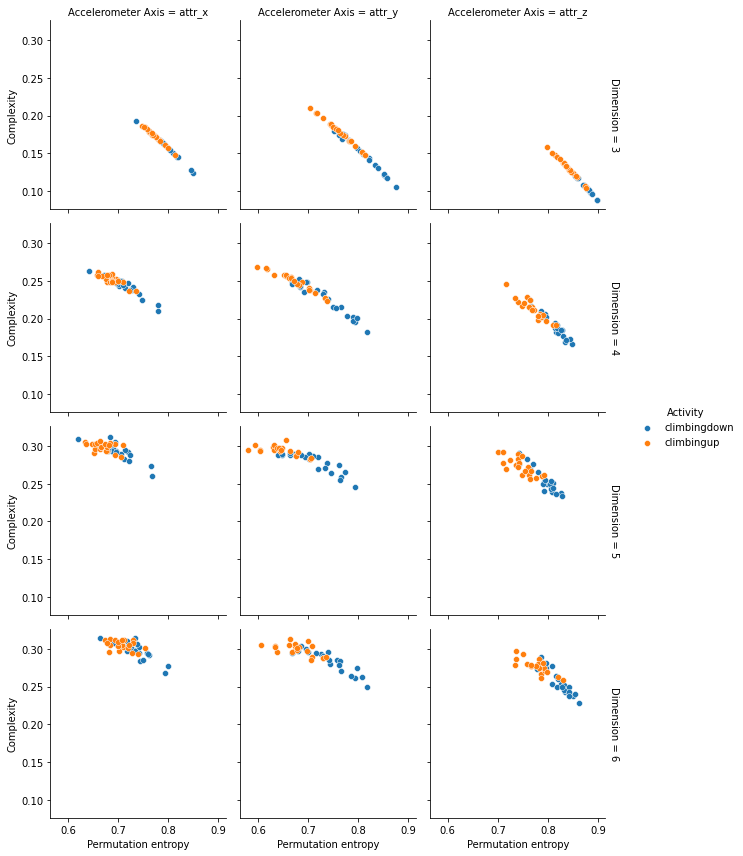

In [ ]:
g = sns.FacetGrid(df2_climb_upperarm, col="Accelerometer Axis", hue="Activity", row ="Dimension", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Permutation entropy", y="Complexity", palette='deep')
g.add_legend()
plt.show()

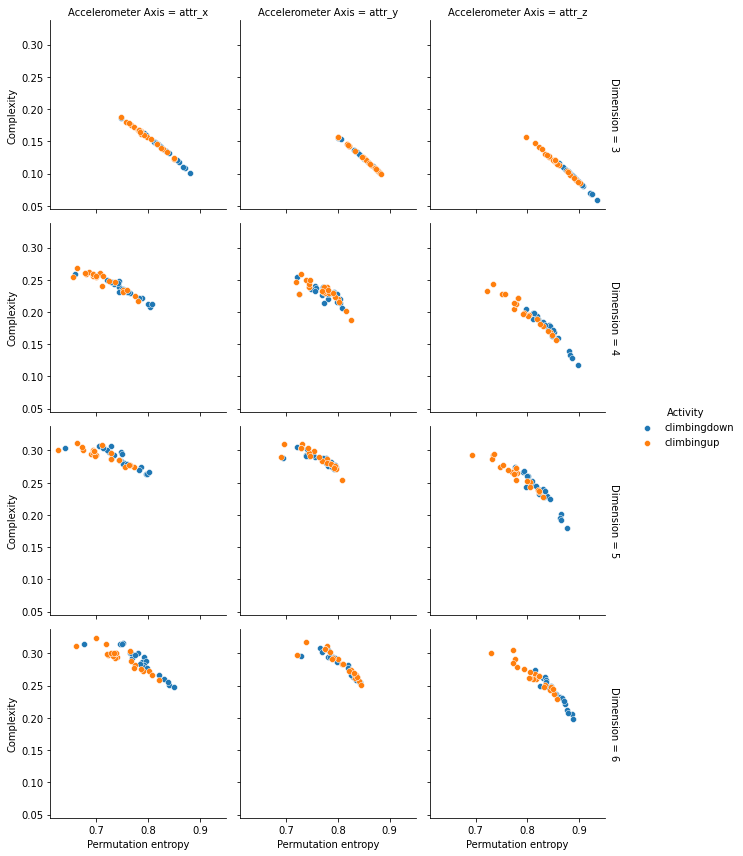

In [ ]:
g = sns.FacetGrid(df2_climb_waist, col="Accelerometer Axis", hue="Activity", row ="Dimension", margin_titles= True)
g.map_dataframe(sns.scatterplot, x="Permutation entropy", y="Complexity", palette='deep')
g.add_legend()
plt.show()

We are getting better separation between climbing up and down for sensor location head with dimention parameter set to 6 and accelerometer axis x.